## House Prices - Advanced Regression Techniques 

### David Triniad, (Final Project) W207, Spring 2022

Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

The goal in this notebook was merely just to load the data, do some minor cleaning, then plugging it into a basic linear model using sklearn. My kaggle score for was 0.20640 ranking me 3518 out of 4312. 

In [21]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import metrics

<ipython-input-21-8dc26629b717>:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [22]:
train_data = pd.read_csv('train.csv',delimiter=',',header=0)
test_data = pd.read_csv('test.csv',delimiter=',',header=0)

In [23]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
train_data.shape

(1460, 81)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
#train_data_float = train_data.select_dtypes(['float']).info()
count_null_floats = train_data.select_dtypes(['float']).isnull().sum()

#print(train_data_float)
print("-------total null values for float type features in training Data---------")
print(count_null_floats)



-------total null values for float type features in training Data---------
LotFrontage    259
MasVnrArea     8  
GarageYrBlt    81 
dtype: int64


In [28]:
## Fill Nussubg values for floats with mean for both training and test data sets
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

In [29]:
count_null_objects = train_data.select_dtypes(['object']).isnull().sum()

#print(train_data_float)
print("-------total null values for object type features---------")
print(count_null_objects)


-------total null values for object type features---------
MSZoning         0   
Street           0   
Alley            1369
LotShape         0   
LandContour      0   
Utilities        0   
LotConfig        0   
LandSlope        0   
Neighborhood     0   
Condition1       0   
Condition2       0   
BldgType         0   
HouseStyle       0   
RoofStyle        0   
RoofMatl         0   
Exterior1st      0   
Exterior2nd      0   
MasVnrType       8   
ExterQual        0   
ExterCond        0   
Foundation       0   
BsmtQual         37  
BsmtCond         37  
BsmtExposure     38  
BsmtFinType1     37  
BsmtFinType2     38  
Heating          0   
HeatingQC        0   
CentralAir       0   
Electrical       1   
KitchenQual      0   
Functional       0   
FireplaceQu      690 
GarageType       81  
GarageFinish     81  
GarageQual       81  
GarageCond       81  
PavedDrive       0   
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType         0   
SaleCondition    

<AxesSubplot:>

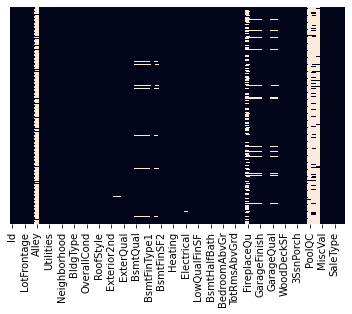

In [30]:
#Getting a visual of all the null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, fmt="d")

In [31]:
# train data; convert categoricals to integers
categoricals = train_data.select_dtypes(['object']).columns
train_data[categoricals] = train_data[categoricals].apply(lambda x: x.astype('category').cat.codes)
train_data = train_data.fillna(value=0)

# test data; convert categoricals to integers
categoricals = test_data.select_dtypes(['object']).columns
test_data[categoricals] = test_data[categoricals].apply(lambda x: x.astype('category').cat.codes)
test_data = test_data.fillna(value=0)



In [32]:
#Dropping objects with over 1000 missing objects for both train and testing data sets
train_data.drop(['Alley', 'MiscFeature', 'PoolQC', 'Fence'],axis=1,inplace=True)
test_data.drop(['Alley', 'MiscFeature', 'PoolQC', 'Fence'],axis=1,inplace=True)

In [33]:
train_data.shape

(1460, 77)

In [34]:
test_data.shape

(1459, 76)

<AxesSubplot:>

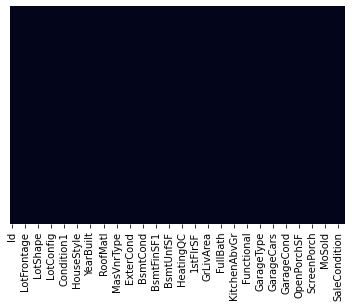

In [35]:
#Checking for null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [36]:
#Form Development Data set and Davelopment labels from training dataset
testdev_split = int(len(train_data)/2)

train_data_copy = train_data.copy()[testdev_split:]
train_labels = train_data["SalePrice"].copy()
train_data_copy = train_data.drop( ["SalePrice"], axis=1 )

dev_data = train_data.copy()[:testdev_split]
dev_labels = dev_data["SalePrice"].copy()
dev_data = dev_data.drop( ["SalePrice"], axis=1 )

test_data_copy = test_data.copy()

In [37]:
X = LinearRegression()
X.fit(train_data_copy, train_labels)
print("Coefficients: " + str(X.coef_))
print('R^2: %1.2f' % X.score(dev_data, dev_labels))


pred_labels = X.predict(dev_data)

# r2_score should be the same as reg.score
print (metrics.r2_score(dev_labels,pred_labels, multioutput='uniform_average'))
print (metrics.explained_variance_score(dev_labels,pred_labels, multioutput='uniform_average'))


Coefficients: [-1.63101317e+00 -1.14739158e+02 -1.47821206e+03 -1.43908160e+02
  3.48908273e-01  3.17256540e+04 -1.01345899e+03  3.39336898e+03
 -4.94301646e+04 -4.96827312e+01  6.75813721e+03  4.08402404e+02
 -6.22471297e+02 -8.90085873e+03 -2.43212769e+03 -1.07818373e+03
  1.14435239e+04  4.93578981e+03  1.96586921e+02  2.34162371e+01
  2.18646450e+03  4.55826001e+03 -8.19280570e+02  2.46054417e+02
  3.04239503e+03  2.66866544e+01 -9.20104915e+03  4.45515807e+02
  2.04153439e+02 -7.12357576e+03  3.35398881e+03 -3.07050889e+03
 -6.13472437e+02  3.43478635e+00  2.63563790e+03  1.39886831e+01
 -4.33035993e+00  1.30931095e+01 -2.79804046e+03 -5.90432197e+02
  9.89476831e+02 -5.68570052e+02  1.64669787e+01  2.13020631e+01
 -1.20971311e+01  2.56719106e+01  7.73413322e+03  2.22531002e+03
  3.44314531e+03 -6.29666509e+02 -3.98428540e+03 -1.57927490e+04
 -8.28937180e+03  3.54711214e+03  3.79253880e+03  8.64278674e+03
 -1.45564608e+03  3.72515407e+02 -1.10324417e+01 -1.24558027e+03
  1.4266257

In [39]:
# predict test labels
pred_labels = reg.predict(test_data)
pred_labels = pred_labels.astype(int)

# output predictions:  id, price
sub = pd.DataFrame(test_data["Id"])
sub["SalePrice"] = pred_labels

print(sub[:20])
sub.to_csv(path_or_buf="baseline_submisson.csv",index=False)

      Id  SalePrice
0   1461  102915   
1   1462  151958   
2   1463  165629   
3   1464  186133   
4   1465  188062   
5   1466  170882   
6   1467  188360   
7   1468  162250   
8   1469  194685   
9   1470  111310   
10  1471  193785   
11  1472  101264   
12  1473  85707    
13  1474  147357   
14  1475  105293   
15  1476  347995   
16  1477  243334   
17  1478  303505   
18  1479  295592   
19  1480  427178   


baseline_result


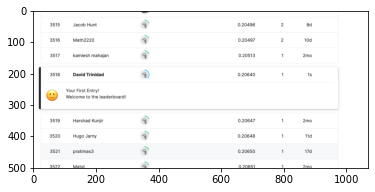

In [42]:
import matplotlib.image as mpimg

image = mpimg.imread("baseline_result.png")
plt.imshow(image)
plt.show()